In [140]:
import numpy as np
import xarray as xr
import os.path as op
import pylab as pl

from matplotlib import colors
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datadir = '/data/scratch/takaya/POP_data/'
swotdir = '/swot/SUM05/takaya/POP_data/'

# Frontogenesis function

$$\boldsymbol{Q}_s = - (u_x b_x + v_x b_y,\ u_y b_x + v_y b_y)$$

Decretization of the tracer field at the tracer points would be

$$\frac{dT}{dx} = \frac{1}{2}\bigg( \frac{T_{i,j} - T_{i-1,j}}{.5 (\Delta x^u_{i-1,j} + \Delta x^u_{i-1,j-1})} + \frac{T_{i+1,j} - T_{i,j}}{.5 (\Delta x^u_{i,j} + \Delta x^u_{i,j-1})} \bigg)$$

$$\frac{dT}{dy} = \frac{1}{2}\bigg( \frac{T_{i,j} - T_{i,j-1}}{.5 (\Delta y^u_{i,j-1} + \Delta y^u_{i-1,j-1})} + \frac{T_{i,j+1} - T_{i,j}}{.5 (\Delta y^u_{i,j} + \Delta y^u_{i-1,j})} \bigg)$$

In [68]:
vel = xr.open_dataset(op.join(datadir, 
                             'Surface_Daily/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0046-01-01.nc'),
                     decode_times=False)
mask_vel = vel.KMU > 1
mask_tracer = vel.KMT > 1
u = 1e-2 * vel.U1_1.where(mask_vel)
v = 1e-2 * vel.V1_1.where(mask_vel)
dxu = 1e-2 * vel.DXU.where(mask_vel)
dyu = 1e-2 * vel.DYU.where(mask_vel)
dxt = 1e-2 * vel.DXT.where(mask_tracer)
dyt = 1e-2 * vel.DYT.where(mask_tracer)

In [78]:
lat = vel.TLAT
lon = vel.TLONG

In [65]:
density = xr.open_dataset(op.join(swotdir,
                              'surface_data/POP_potential_density0046-01.nc'))
r = density.potential_density.where(mask_tracer)

In [66]:
density

<xarray.Dataset>
Dimensions:            (days: 31, nlat: 2400, nlon: 3600)
Coordinates:
    lat                (nlat, nlon) float64 nan nan nan nan nan nan nan nan ...
    lon                (nlat, nlon) float64 nan nan nan nan nan nan nan nan ...
    ULONG              (nlat, nlon) float64 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 ...
    ULAT               (nlat, nlon) float64 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 ...
    TLONG              (nlat, nlon) float64 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 ...
    TLAT               (nlat, nlon) float64 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 ...
  * days               (days) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
  * nlat               (nlat) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
  * nlon               (nlon) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
Data variables:
    potential_density  (days, nlat, nlon) float64 nan nan nan nan nan nan ...
    KMT                (nlat, nlon) float64 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 ...

In [69]:
u

<xarray.DataArray (time: 31, nlat: 2400, nlon: 3600)>
array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  

In [70]:
r

<xarray.DataArray (days: 31, nlat: 2400, nlon: 3600)>
array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  

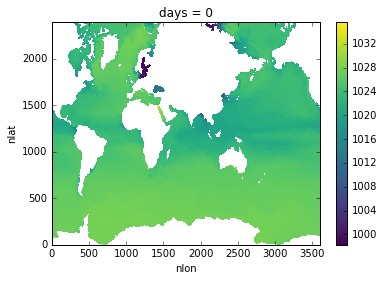

In [56]:
r[0].plot()

In [57]:
g = 9.8; r0 = 1025.
b = -g*r0**-1 * (r-r0)
dbdx = ((b.values - b.roll(nlon=1).values)/(dxu.roll(nlon=1).values + dxu.roll(nlon=1, nlat=1).values)
        +(b.roll(nlon=-1).values - b.values)/(dxu.values + dxu.roll(nlat=1).values))

dbdy = ((b.values - b.roll(nlat=1).values)/(dyu.roll(nlat=1).values + dyu.roll(nlon=1, nlat=1).values)
        +(b.roll(nlat=-1).values - b.values)/(dyu.values + dyu.roll(nlon=1).values))

In [17]:
print(dbdx[0, 1000:1100, 1000:1100])

[[ -1.95491031e-08   1.45875271e-08   2.23073275e-08 ...,   5.05117129e-08
    6.43986164e-09  -9.67759038e-09]
 [  7.92160703e-10   3.80536887e-08   3.93645296e-08 ...,   1.05048283e-07
    3.41541216e-08   5.91967675e-10]
 [  8.96718651e-09   3.89868217e-08   4.45350344e-08 ...,   1.23941816e-07
    7.30635880e-08   3.35087256e-08]
 ..., 
 [  5.36555191e-08   5.36706600e-08   2.92486345e-08 ...,  -4.28490194e-10
   -2.34720177e-09   2.56878425e-08]
 [  2.55687077e-08   1.64464729e-08   6.18654929e-09 ...,  -1.03086104e-08
    9.60208702e-09   7.88348843e-08]
 [  8.42734225e-09   6.44087226e-09   4.34080380e-09 ...,  -1.47971169e-08
    2.98779055e-08   1.13637265e-07]]


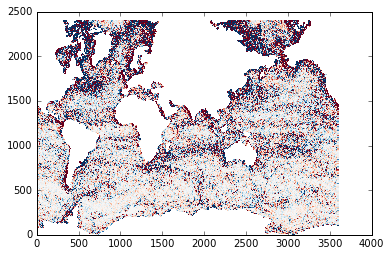

In [58]:
plt.pcolormesh(np.ma.masked_invalid(dbdx[0]), cmap='RdBu_r',
              vmin=-5e-8, vmax=5e-8)

$$\frac{d\boldsymbol{u}}{dx} = \frac{1}{2} \bigg( \frac{(\boldsymbol{u}_{i,j} - \boldsymbol{u}_{i-1,j}) + (\boldsymbol{u}_{i,j-1} - \boldsymbol{u}_{i-1,j-1})}{dx^T_{i,j}} \bigg)$$

$$\frac{d\boldsymbol{u}}{dy} = \frac{1}{2} \bigg( \frac{(\boldsymbol{u}_{i,j} - \boldsymbol{u}_{i,j-1}) + (\boldsymbol{u}_{i-1,j} - \boldsymbol{u}_{i-1,j-1})}{dy^T_{i,j}} \bigg)$$

In [59]:
dudx = (.5*((u.values - u.roll(nlon=1).values) 
            + (u.roll(nlat=1).values - u.roll(nlon=1,nlat=1).values))/dxt.values)

dvdx = (.5*((v.values - v.roll(nlon=1).values) 
            + (v.roll(nlat=1).values - v.roll(nlon=1,nlat=1).values))/dxt.values)


dudy = (.5*((u.values - u.roll(nlat=1).values) 
            + (u.roll(nlon=1).values - u.roll(nlon=1,nlat=1).values))/dyt.values)

dvdy = (.5*((v.values - v.roll(nlat=1).values) 
            + (v.roll(nlon=1).values - v.roll(nlon=1,nlat=1).values))/dyt.values)

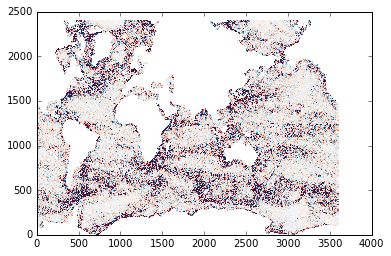

In [43]:
plt.pcolormesh(np.ma.masked_invalid(dudx[0]), cmap='RdBu_r',
              vmin=-5e-6, vmax=5e-6)

In [60]:
Qx = -(dudx*dbdx + dvdx*dbdy)
Qy = -(dudy*dbdx + dvdy*dbdy)

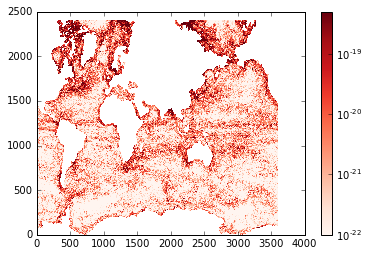

In [61]:
plt.pcolormesh(np.ma.masked_invalid(np.absolute((Qx*dbdx + Qy*dbdy)[0])), cmap='Reds',
              norm=colors.LogNorm(vmin=1e-22, vmax=5e-19))
plt.colorbar()

# Chew through years and months of data

In [46]:
years = range(41)
months = (1,2,3,7,8,9)

In [106]:
Nt_JFM = (3+2+2)*len(years)
Nt_JAS = (3+2+3)*len(years)
daystart = [0,8,6,0,8,3]

In [ ]:
g = 9.8; r0 = 1025.

for year in years:
    for month in months:
        dname = op.join(datadir, 
                        'Surface_Daily/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.%04d-%02d-01.nc'
                       % (year+46, month)
                       )
        ds = xr.open_dataset(dname, decode_times=False)
        mask_vel = ds.KMU > 1
        mask_tracer = ds.KMT > 1
        u = ds.U1_1.where(mask_vel)
        v = ds.V1_1.where(mask_vel)
        if year == years[0] and month == months[0]:
            dxu = 1e-2 * ds.DXU.where(mask_vel)
            dyu = 1e-2 * ds.DYU.where(mask_vel)
            dxt = ds.DXT.where(mask_tracer)
            dyt = ds.DYT.where(mask_tracer)

        rname = op.join(swotdir,
                        'surface_data/POP_potential_density%04d-%02d.nc'
                        % (year+46, month)
                       )
        rs = xr.open_dataset(rname)
        print(dname, rname)
        r = rs.potential_density.where(mask_tracer)
        print(u.shape, v.shape, r.shape)
        b = -g*r0**(-1) * (r - r0)
        
        dbdx = ((b.values - b.roll(nlon=1).values)/(dxu.roll(nlon=1).values + dxu.roll(nlon=1, nlat=1).values)
                +(b.roll(nlon=-1).values - b.values)/(dxu.values + dxu.roll(nlat=1).values))
        dbdy = ((b.values - b.roll(nlat=1).values)/(dyu.roll(nlat=1).values + dyu.roll(nlon=1, nlat=1).values)
                +(b.roll(nlat=-1).values - b.values)/(dyu.values + dyu.roll(nlon=1).values))
        
        dudx = (.5*((u.values - u.roll(nlon=1).values) 
                    + (u.roll(nlat=1).values - u.roll(nlon=1,nlat=1).values))/dxt.values)
        dvdx = (.5*((v.values - v.roll(nlon=1).values) 
                    + (v.roll(nlat=1).values - v.roll(nlon=1,nlat=1).values))/dxt.values)
        dudy = (.5*((u.values - u.roll(nlat=1).values) 
                    + (u.roll(nlon=1).values - u.roll(nlon=1,nlat=1).values))/dyt.values)
        dvdy = (.5*((v.values - v.roll(nlat=1).values) 
                    + (v.roll(nlon=1).values - v.roll(nlon=1,nlat=1).values))/dyt.values)
        
        Qx = -(dudx*dbdx + dvdx*dbdy)
        Qy = -(dudy*dbdx + dvdy*dbdy)
        
        savename = op.join(swotdir, 
                           'analysis_results/FrontogenesisFunction.%04d-%02d.nc'
                          % (year+46, month)
                          )
        print(savename)
        xr.DataArray(Qx*dbdx + Qy*dbdy, dims=ds.SST.dims, 
                     coords=ds.SST.coords).to_dataset(name='Fs').to_netcdf(savename)

('/data/scratch/takaya/POP_data/Surface_Daily/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0046-01-01.nc', '/swot/SUM05/takaya/POP_data/surface_data/POP_potential_density0046-01.nc')
((31, 2400, 3600), (31, 2400, 3600), (31, 2400, 3600))
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0046-01.nc
('/data/scratch/takaya/POP_data/Surface_Daily/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0046-02-01.nc', '/swot/SUM05/takaya/POP_data/surface_data/POP_potential_density0046-02.nc')
((28, 2400, 3600), (28, 2400, 3600), (28, 2400, 3600))
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0046-02.nc
('/data/scratch/takaya/POP_data/Surface_Daily/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0046-03-01.nc', '/swot/SUM05/takaya/POP_data/surface_data/POP_potential_density0046-03.nc')
((31, 2400, 3600), (31, 2400, 3600), (31, 2400, 3600))
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0046-03.nc
('/data/scratch/takaya/POP_data/Surface_Dai

In [100]:
def histogram(Fs_JFM, Fs_JAS, figsize=(10,5), 
              bins=10**np.linspace(-21,-18,20), 
              normed=True, log=True,  
             hemi='north', figname='Histogram_FrontogensisFunction_Kuroshio.pdf'):
    """
    Function for plotting histograms
    """
    
    fig = plt.figure(figsize=figsize)

    ax = plt.gca()
    # cent = .5*(bin_edges[1:] + bin_edges[:-1])
    # ax.bar(cent, hist_alphaKwin, align='center')
    if hemi == 'north':
        n, bins, patches = ax.hist(Fs_JFM, 
                                bins=bins, normed=normed, log=log,
                                facecolor='b', 
                                alpha=.5, label='JFM')
        n, bins, patches = ax.hist(Fs_JAS, 
                                bins=bins, normed=normed, log=log,
                                facecolor='r', 
                                alpha=.5, label='JAS')
    else:
        n, bins, patches = ax.hist(Fs_JAS, 
                                bins=bins, normed=normed, log=log,
                                facecolor='b', 
                                alpha=.5, label='JAS')
        n, bins, patches = ax.hist(Fs_JFM, 
                                bins=bins, normed=normed, log=log,
                                facecolor='r', 
                                alpha=.5, label='JFM')
    ax.set_title(r'Frontogenesis function', fontsize=16)
    ax.set_xlabel(r'$|Fs|$', fontsize=15)
    plt.legend(loc='upper right', fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    
#     plt.savefig(figname, bbox_inches='tight')
    plt.show()

In [77]:
def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.

    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
        >>> # linear interpolation of NaNs
        >>> nans, x= nan_helper(y)
        >>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """

    return np.isnan(y), lambda z: z.nonzero()[0]

In [79]:
lat1D = lat.values[:, 2900].copy()
nans, x= nan_helper(lat1D)
lat1D[nans]= np.interp(x(nans), x(~nans), lat1D[~nans])

metalat = np.zeros_like(lat1D)
for i in range(len(lat1D)):
    metalat[i] = round(lat1D[i], 3)
    

lon1D = lon.values[440].copy()
nans, x= nan_helper(lon1D)
lon1D[nans]= np.interp(x(nans), x(~nans), lon1D[~nans])

metalon = np.zeros_like(lon1D)
for i in range(len(lon1D)):
    metalon[i] = round(lon1D[i], 3)

In [80]:
lats_Kuro = (31.5, 41.5)
lonTs_Kuro = (1.49950000e+02, 1.59950000e+02)
lonUs_Kuro = (1.49900000e+02, 1.59900000e+02)

lats_NK = (39.5, 49.5)
lonTs_NK = (1.67050000e+02, 1.77050000e+02)
lonUs_NK = (1.67000000e+02, 1.77000000e+02)

lats_EP = (12.5, 22.5)
lonTs_EP = (2.35950000e+02, 2.45950000e+02)
lonUs_EP = (2.35900000e+02, 2.45900000e+02)

lats_GS = (34.5, 44.5)
lonTs_GS = (2.95950000e+02, 3.05950000e+02)
lonUs_GS = (2.95900000e+02, 3.05900000e+02)

lats_NEAt = (50.5, 60.5)
lonTs_NEAt = (3.35050000e+02, 3.45050000e+02)
lonUs_NEAt = (3.35000000e+02, 3.45000000e+02)

lats_Sar = (18.5, 28.5)
lonTs_Sar = (2.95050000e+02, 3.05050000e+02)
lonUs_Sar = (2.95000000e+02, 3.05000000e+02)

lats_ACC = (-56.5, -46.5)
lonTs_ACC = (1.45050000e+02, 1.55050000e+02)
lonUs_ACC = (1.45000000e+02, 1.55000000e+02)

In [109]:
def each_region(lats, lons):
    i,j = (0,0)
    for year in years:
        id = 0
        for month in months:
            fname = op.join(swotdir,
                           'analysis_results/FrontogenesisFunction.%04d-%02d.nc'
                              % (year+46, month)
                            )
            print(fname)
            Fs = xr.open_dataset(fname, decode_times=False).Fs
            Nt = Fs.shape[0]
            Fs_labeled = xr.DataArray(Fs.values, dims=['days','lat','lon'],
                                      coords={'days':range(Nt),'lat':metalat,'lon':metalon})

            if month < 7:
                if year == years[0] and month == months[0]:
                    Nt, Ny, Nx = Fs_labeled.sel(lat=slice(lats[0], lats[1]), 
                                            lon=slice(lons[0], lons[1])
                                           ).shape
                    Fs_JFM = np.zeros((Nt_JFM, Ny, Nx))
                    Fs_JAS = np.zeros((Nt_JAS, Ny, Nx))
                data = Fs_labeled.sel(lat=slice(lats[0], lats[1]), 
                                      lon=slice(lons[0], lons[1])
                                               ).values[daystart[id]::13]
                dt = data.shape[0]
                Fs_JFM[i:i+dt] = data
                i += dt

            elif month > 3:
                data = Fs_labeled.sel(lat=slice(lats[0], lats[1]), 
                                      lon=slice(lons[0], lons[1])
                                               ).values[daystart[id]::13]
                dt = data.shape[0]
                Fs_JAS[j:j+dt] = data
                j += dt

            id += 1
    return Fs_JFM, Fs_JAS

In [ ]:
Fs_JFM_Kuro, Fs_JAS_Kuro = each_region(lats_Kuro, lonTs_Kuro)

/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0046-01.nc
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0046-02.nc
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0046-03.nc
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0046-07.nc
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0046-08.nc
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0046-09.nc
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0047-01.nc
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0047-02.nc
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0047-03.nc
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0047-07.nc
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0047-08.nc
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0047-09.nc
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFuncti

In [ ]:
Fs_JFM_NK, Fs_JAS_NK = each_region(lats_NK, lonTs_NK)
Fs_JFM_EP, Fs_JAS_EP = each_region(lats_EP, lonTs_EP)
Fs_JFM_GS, Fs_JAS_GS = each_region(lats_GS, lonTs_GS)
Fs_JFM_Sar, Fs_JAS_Sar = each_region(lats_Sar, lonTs_Sar)
Fs_JFM_NEAt, Fs_JAS_NEAt = each_region(lats_NEAt, lonTs_NEAt)
Fs_JFM_ACC, Fs_JAS_ACC = each_region(lats_ACC, lonTs_ACC)

/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0046-01.nc
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0046-02.nc
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0046-03.nc
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0046-07.nc
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0046-08.nc
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0046-09.nc
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0047-01.nc
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0047-02.nc
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0047-03.nc
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0047-07.nc
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0047-08.nc
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFunction.0047-09.nc
/swot/SUM05/takaya/POP_data/analysis_results/FrontogenesisFuncti

In [112]:
print(Fs_JFM_Kuro.shape, Fs_JAS_Kuro.shape)
print(Fs_JFM_ACC.shape, Fs_JAS_ACC.shape)

((287, 111, 101), (328, 111, 101))
((287, 162, 101), (328, 162, 101))


In [116]:
print(Fs_JFM_Kuro[0])

[[ -1.40251964e-21  -8.56219982e-22  -3.99819051e-22 ...,   8.68446084e-22
    7.48862901e-21   8.46024447e-22]
 [ -2.96720820e-21  -2.45744855e-21  -1.94812813e-21 ...,  -6.66392766e-23
    8.93594544e-21  -6.39306655e-23]
 [ -2.84717381e-21  -2.43628573e-21  -2.09452624e-21 ...,   1.33527874e-20
    2.09509563e-21  -7.67175826e-23]
 ..., 
 [ -1.23834561e-21  -2.97225738e-20  -3.66835771e-20 ...,   1.36758981e-20
    2.37723244e-20   3.72249566e-20]
 [  1.48984167e-20  -1.79834085e-20  -9.57274492e-21 ...,   5.99124422e-20
    3.22391625e-20   8.40129216e-21]
 [  1.19383193e-19   2.68478734e-20  -1.16615030e-20 ...,   4.27924135e-21
    4.11122779e-21   1.11467026e-21]]


In [115]:
test = np.reshape(Fs_JFM_Kuro,(1,Nt_JFM*Ny*Nx))

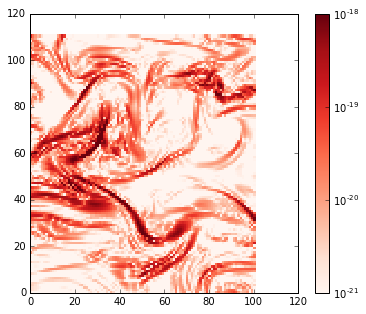

In [136]:
plt.figure(figsize=(6,5))
plt.pcolormesh(np.abs(Fs_JFM_Kuro[0]), cmap='Reds',
              norm=colors.LogNorm(vmin=1e-21, vmax=1e-18))
plt.colorbar()

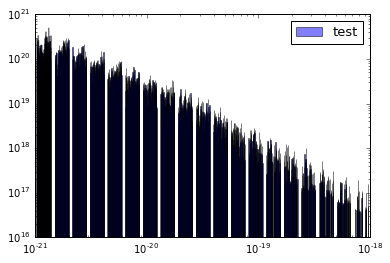

In [145]:
fig = plt.figure()
ax = plt.gca()
n, bins, patches = ax.hist(np.absolute(Fs_JFM_Kuro[0]), 
                           bins=10**np.linspace(-21,-18,20), 
                           normed=True, log=True,
                           facecolor='b', 
                           alpha=.5, label='test')
ax.set_xscale('log')
plt.legend(loc='upper right', fontsize=13)
plt.show()

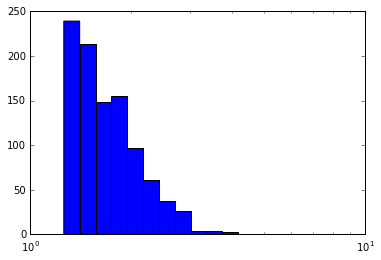

In [147]:
data = np.random.normal(size=10000)
pl.hist(data, bins=np.logspace(0.1, 1.0, 20))
pl.gca().set_xscale("log")
pl.show()

In [143]:
Ny, Nx = Fs_JFM_Kuro[0].shape
histogram(np.reshape(np.absolute(Fs_JFM_Kuro),
                     (1,Nt_JFM*Ny*Nx)), 
          np.reshape(np.absolute(Fs_JAS_Kuro),
                     (1,Nt_JAS*Ny*Nx))
         )

KeyboardInterrupt: 

Error in callback <function post_execute at 0x7fd4b80e48c0> (for post_execute):


ValueError: object too deep for desired array

ValueError: object too deep for desired array